### 分水岭算法

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def watershed_algorithm(image):
    # 边缘保留滤波EPF  去噪
    blur = cv2.pyrMeanShiftFiltering(image,sp=10,sr=100)
    # 转成灰度图像
    gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
    # 得到二值图像   自适应阈值
    ret, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    #cv2.imshow('binary image', binary)

    # 形态学操作   获取结构元素  开操作
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel=kernel, iterations=2)
    # 确定区域
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    # cv2.imshow('mor-opt', sure_bg)

    # 距离变换
    dist = cv2.distanceTransform(opening, cv2.DIST_L2, 3)
    dist_out = cv2.normalize(dist, 0, 1.0, cv2.NORM_MINMAX)
    # cv2.imshow('distance-', dist_out * 50)
    ret, surface = cv2.threshold(dist_out, dist_out.max() * 0.6, 255, cv2.THRESH_BINARY)
    # cv2.imshow('surface-markers', surface)

    surface_fg = np.uint8(surface)    # 转成8位整型
    unkonown = cv2.subtract(sure_bg, surface_fg)        # 找到位置区域
    # Marker labelling
    ret, markers = cv2.connectedComponents(surface_fg)  # 连通区域
    # print(ret)

    # 分水岭变换
    # Add one to all labels so that sure background is not 0, but 1
    markers = markers + 1
    # Now, mark the region of unknown with zero
    markers[unkonown == 255] = 0
    # 实施分水岭算法了。标签图像将会被修改，边界区域的标记将变为 -1
    markers = cv2.watershed(image, markers=markers)
    image[markers == -1] = [0, 0, 255]      # 被标记的区域   设为红色
    return image

(Text(0.5, 1.0, 'FSLImg'), ([], []), ([], []))

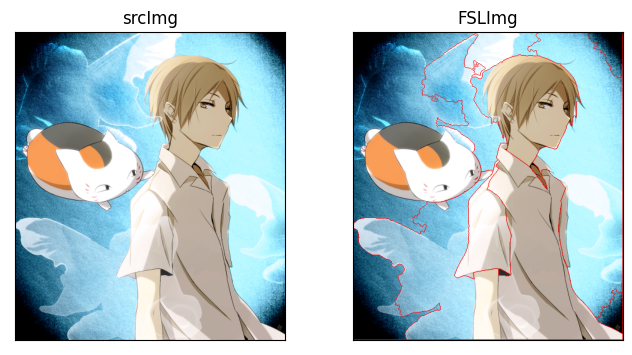

In [3]:
srcImg = cv2.imread(r'1.PNG')
srcImg = cv2.resize(srcImg, None, fx=0.5, fy=0.5)
srcImgShow = cv2.cvtColor(srcImg,cv2.COLOR_BGR2RGB)
FSLImg = watershed_algorithm(srcImg)
FSLImgShow = cv2.cvtColor(FSLImg,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,4))
plt.subplot(121),plt.imshow(srcImgShow)
plt.title("srcImg"), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(FSLImgShow)
plt.title("FSLImg"), plt.xticks([]), plt.yticks([])